In [ ]:
# Manipulação dos Dados
import numpy as np
import pandas as pd
import json
 
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
 
# Visualização dos Dados
import matplotlib.pyplot as plt
import seaborn as sns
 
# Machine Learning

In [ ]:
df_artists = pd.read_csv("artists.csv")

In [ ]:
df_tracks = pd.read_csv("tracks.csv")

In [ ]:
with open('dict_artists.json', 'r') as f:
  data = json.load(f)

related_artists = pd.DataFrame.from_dict(data, orient='index')

# DataFrame **Artists**

In [ ]:
df_artists

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1104344,6rJIG42vcWAf1UBdRFlQxB,3345.0,[],Cody Longo,8
1104345,1ljurfXKPlGncNdW3J8zJ8,2123.0,['deep acoustic pop'],Right the Stars,18
1104346,2vnT9YhKIvjVo9LnVjWmr2,26.0,[],Jesse Giddings,0
1104347,3ID0E5XCvnJIYZEq043ZoB,406.0,[],The Boy Band Project,0


In [ ]:
df_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


In [ ]:
df_artists.describe()

,followers,popularity
count,1.104336e+06,1.104349e+06
mean,1.074304e+04,9.083884e+00
std,2.609554e+05,1.376310e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,5.900000e+01,2.000000e+00
75%,4.510000e+02,1.400000e+01
max,7.890023e+07,1.000000e+02


In [ ]:
df_artists[df_artists.duplicated()]

,id,followers,genres,name,popularity


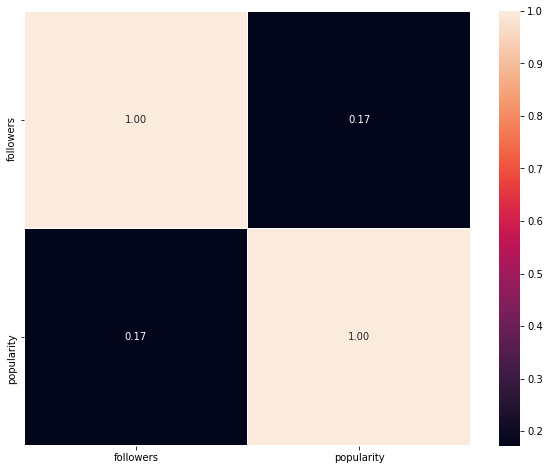

In [ ]:
matrix_artists = df_artists.corr()
plt.figure(figsize=(10,8))
sns.heatmap(matrix_artists, annot=True, linewidths=0.5, fmt=".2f")

# - artist id: *hash* que identifica o artista

Nesta coluna NÃO EXISTEM valores faltantes

In [ ]:
df_artists["id"].nunique()

1104349

In [ ]:
type(df_artists["id"][0])

str

*   Cada artista possui um id único
*   O Dtype da coluna será convertido para String, para ser usado nas próximas etapas


In [ ]:
df_artists["id"] = df_artists["id"].astype('string')

# - artist followers: quantidade de seguidores que o artista tem


TRATANDO VALORES FALTANTES

In [ ]:
df_artists.loc[df_artists["followers"].isnull()]

,id,followers,genres,name,popularity
444199,7F71W80jaXFARK7hBjsDI2,NaN,['czech pop'],Marcell,36
444200,3MLHJz04KmEVzCTPclzkEm,NaN,['czech pop'],Niko,21
444797,0cqZsULDZdJTGA4Zqh8Ckv,NaN,[],Savzilla,0
444798,0BuknWzKujyc9HfZ1V50Uk,NaN,[],Duck Doja,0
446635,6ltU5gIDLmWNYaVNHnll5G,NaN,['mexican electronic'],Zofa,0
446636,7C9nWRMbRqpPUuKh2OEw9n,NaN,[],MHV,3
446637,41c30F8zy5UCTSevbn0WfD,NaN,['mexican electronic'],Broadband Star,0
468525,1DK979aOesiZ4Vkus8txqu,NaN,[],AmorArtis Orchestra & Johannes Somary,2
468526,6jkpqSWWsXSuqtsoeAiMDU,NaN,['uk americana'],Police Dog Hogan,14
468527,7aMdHPv79qOuqqBD6TnaCp,NaN,[],"Miles Davis & Charlie ""Bird"" Parker",0


Como temos poucos artistas com valores faltantes no item de Seguidores, será pesquisado os valores reais manualmente na plataforma, e os incluiremos a seguir:

In [ ]:
spotify_followers = {'Marcell' : 344839, 'Niko' : 467, 'Savzilla' : 16, 'Duck Doja' : 10, 
                     'Zofa' : 7, 'MHV' : 117, 'Broadband Star' : 9, 'AmorArtis Orchestra & Johannes Somary' : 15, 
                     'Police Dog Hogan' : 1081, 'Miles Davis & Charlie "Bird" Parker' : 12461, 'Black Dog Prowl' : 198, 
                     'Band of the Fifteenth Field Artillery Regiment, RCA': 27, 'Robert Steven Williams' : 7}

In [ ]:
df_artists["followers"] = df_artists["followers"].fillna(df_artists["name"].map(spotify_followers))

In [ ]:
df_artists["followers"].isnull().any()

False

Os dados serão convertidos para int, visto que não existem Seguidores decimais

In [ ]:
df_artists["followers"] = df_artists["followers"].astype('int')

ANÁLISE DA QUANTIDADE DE SEGUIDORES

In [ ]:
df_artists["followers"].value_counts().sort_values(ascending=False).head(15)

0     67875
1     35979
2     27956
3     24906
4     22155
5     20162
6     18299
7     17019
8     15909
9     14668
10    13579
11    12925
12    11785
13    11583
14    10641
Name: followers, dtype: int64

*   Ao agruparmos os artistas com base na quantidade de seus seguidores, percebe-se uma tendência de que, quanto MAIS seguidores, MENOS artistas semelhantes (sendo que o maior conjunto de artistas é aquele com zero seguidores)
*   Analisaremos isso graficamente



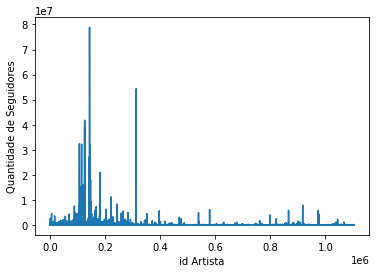

In [ ]:
df_artists["followers"].plot(xlabel='id Artista', ylabel='Quantidade de Seguidores')

*   O dataset contém artistas com quantidade de seguidores muito diversos entre si (de 0 a 70MM+).
*   Assim, para um melhor entendimento do todo, a visualização da quantidade de seguidores será fracionada

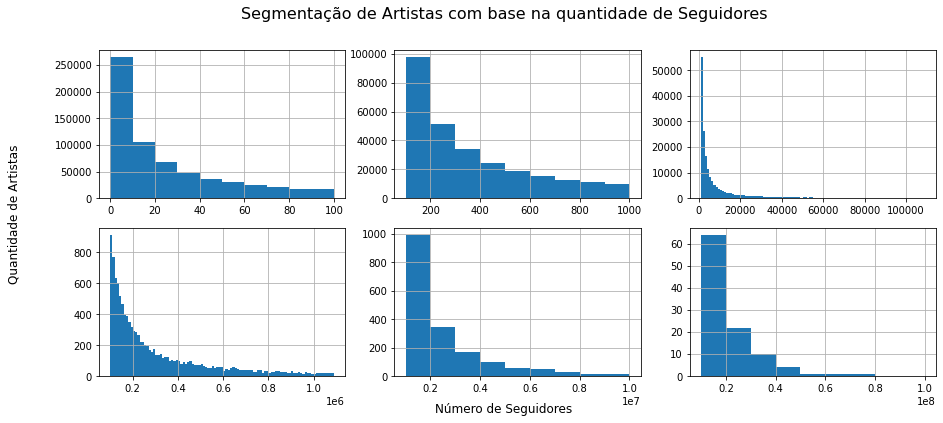

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 6))
ax = axs.ravel()

fig.suptitle('Segmentação de Artistas com base na quantidade de Seguidores', fontsize=16)
fig.text(0.5, 0.04, 'Número de Seguidores', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Quantidade de Artistas', va='center', rotation='vertical', fontsize=12)

ranges = [range(0, 110, 10), range(100, 1100, 100), 
          range(1000, 110000, 1000), range(100000, 1100000, 10000), 
          range(1000000, 11000000, 1000000), range(10000000, 110000000, 10000000)]

for i in range(6):
  df_artists["followers"].hist(bins=ranges[i], ax=ax[i])

plt.show()

In [ ]:
lower_ten_followers = len(df_artists.loc[df_artists['followers'] <= 10])
lower_ten_followers

278507

In [ ]:
perc_lower_ten_followers = lower_ten_followers / len(df_artists)
perc_lower_ten_followers

0.25219110987559185

**Conclusões**

*   É possível perceber que, quanto maior o número de Seguidores, menor a quantidade de Artistas com tal atributo
*   Existem 278.507 usuários com até 10 Seguidores no dataset, o que dá um percentual de 25,22% do total de artistas analisados

# - artist genres: gêneros musicais do artista

Nesta coluna NÃO EXISTEM valores faltantes

CONVERSÃO DA STRING DE GÊNEROS EM LISTA

In [ ]:
df_artists["genres"] = list(df_artists["genres"].replace('[]', 'not specified'))

In [ ]:
for char in ["[", "]", "'", "\""]:
  df_artists["genres"] = df_artists["genres"].str.replace(char, "")

In [ ]:
df_artists["genres"] = df_artists["genres"].str.split(", ")

CRIAÇÃO DE UM DATAFRAME ESPECÍFICO DE GÊNEROS MUSICAIS

In [ ]:
genres = df_artists.explode("genres")["genres"]

In [ ]:
df_genres = pd.DataFrame(np.sort(genres.unique()), columns=["genre_name"])

In [ ]:
pd.set_option('display.max_rows', None)
print(df_genres)
pd.reset_option('display.max_rows')

                                   genre_name
0                      21st century classical
1                                       432hz
2                                         48g
3                                       8-bit
4                                          8d
5                                  a cappella
6                                          a3
7                                aarhus indie
8                              aberdeen indie
9                                    abstract
10                             abstract beats
11                           abstract hip hop
12                               abstract idm
13                                 abstractro
14                                  accordeon
15                                  accordion
16                                 acid house
17                                   acid idm
18                                  acid jazz
19                                  acid rock
20                                

**Conclusões:**

*   Temos 5365 gêneros musicais do dataset (exceto 'não especificado')
*   Muitos gêneros existentes são, na verdade, subdivisões de outros gêneros com base em regionalidades. Ex.: (ukrainian folk, ukrainian hip hop, ukrainian indie,  ukrainian metal, ukrainian pop). 
*   Existem 68 subgêneros apenas de musicas italianas, 59 suecas, 25 turcas, entre outros
*   Talvez seja válido criar uma relação entre gêneros, assim como já existe entre os artistas, para criar recomendações





# - artist name: nome do artista



Nesta coluna NÃO EXISTEM valores faltantes

IDENTIFICANDO ARTISTAS DUPLICADOS

In [ ]:
# Antes de tudo, vamos ordenar o df_artists de acordo com o nome dos artistas

df_artists.sort_values(by="name", inplace=True)

In [ ]:
df_artists[df_artists.duplicated(subset=["name"])]

,id,followers,genres,name,popularity
885971,1fm2KOQ4WV6zZIdIJl3swR,987,[not specified],$avage,19
1038064,5hWiKNbZ0XlVNlJ3SgiQmy,1147,[not specified],$hyfromdatre,26
1054682,3vBY90fOqAJTc9CfqhjAyY,1836,[deep underground hip hop],$kinny,5
178319,49uFVaIaOBoMExifd5SomK,124,[not specified],$lim,3
301850,7n0uM81CFVkTFXcdfpX2RV,159,[not specified],$onny,16
...,...,...,...,...,...
411697,3j9vrMIrCGgFmq0276a3kg,63,[not specified],黄霄雲,20
90834,6RjFDA4deaWUnbFmgJ0Gak,29,[not specified],黑澀會美眉,28
619573,4R6vF2ot4yKvo3iq6cgsqj,30,[not specified],김현주,4
620788,1aLFhn5S6wHAdjrwmc76mv,47,[not specified],장혜진,8




*   É importante que os artistas de nome duplicado não sejam excluídos do dataset, isso porque podem haver perdas ao gerar recomendações (exclusão de faixas do catálogo)
*   Ao invés disso, vamos vincular os perfis dos artistas homônimos, através do DataFrame *related_artists*



In [ ]:
#fuzz.token_sort_ratio("Teste", "Test")

89

In [ ]:
df_artists.loc[df_artists["name"] == '$kinny']

,id,followers,genres,name,popularity
851888,1DwFdML6JPf7SSeXmSRnVN,19149,"[arabic hip hop, gulf hip hop]",$kinny,49
1054682,3vBY90fOqAJTc9CfqhjAyY,1836,[deep underground hip hop],$kinny,5


# DataFrame **Tracks**

In [ ]:
df_tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [ ]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [ ]:
df_tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [ ]:
df_tracks[df_tracks.duplicated()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


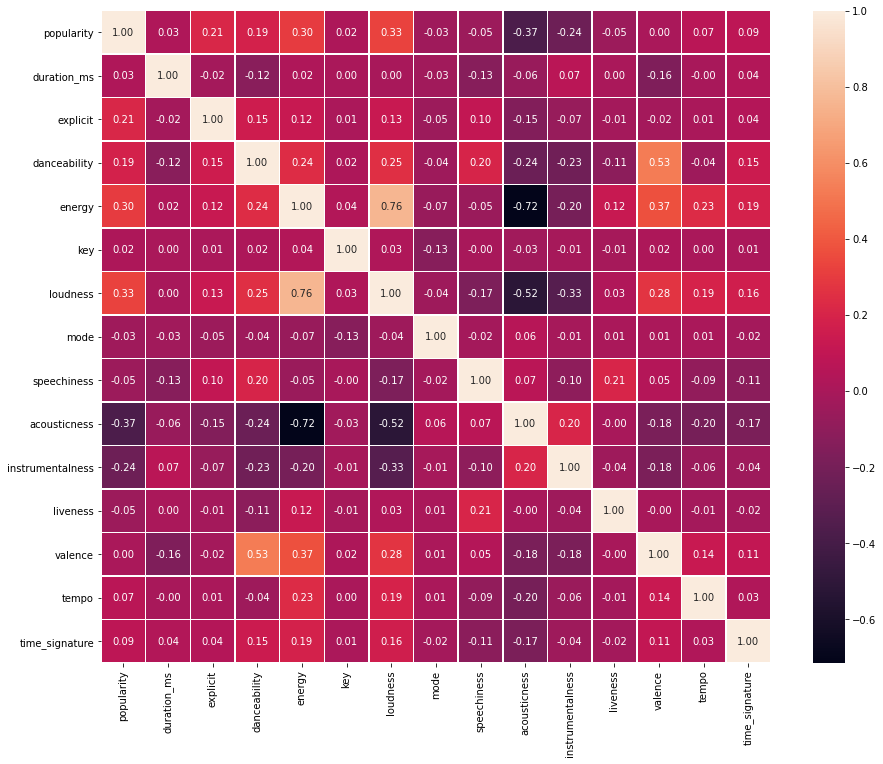

In [ ]:
matrix_tracks = df_tracks.corr()
plt.figure(figsize=(15,12))
sns.heatmap(matrix_tracks, annot=True, linewidths=0.5, fmt=".2f")

# DataFrame **RelatedArtists**

In [ ]:
related_artists

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0DheY5irMjBUeLybbCUEZ2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
0DlhY15l3wsrnlfGio2bjU,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
0DmRESX2JknGPQyO15yxg7,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
0DmhnbHjm1qw6NCYPeZNgJ,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
0Dn11fWM7vHQ3rinvWEl4E,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1qDkZo6EZO7prhbTyh0kjE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
52E1p1CjGZPzI8qdbIodGs,5BPsbp0hZTomLFlVTgdbuj,0qtCZoFConPbcPfkwtqpx6,0g3fnSe3212EM0H45zVQvr,6IllWwuEZXv8D8Z3zq41Uu,3UqGUvLLvbbxxpg2GUTwnL,7vhukwVHbJwCHgzaobUlXG,0jm2LG0drmDo48H3glziUD,6ejhJjv5gHGP3QwsY0bhL8,1qDkZo6EZO7prhbTyh0kjE,1Ok5pQBm58Sy8HD86lP9ji,0tD28H4LMua0acGEN1Bytg,0vtvMFEVjyZUkjZZjUN8Pw,114rf5BAHSpTOuHiHJ8AoH,2rjjDkYiXzWfGDwhkgtCwu,3cMoJnLJinh3xdO6OHuwE6,3qhVkLrZo0YV8HJKbVdCwC,3P3ctFURUm4yNRZeuvJzpv,3QqzpemmnuEXaCJo3MkPwq,4pWwoZtFdq4zPfyCMH10xs,4Rc8pP91qbI45rw3fLCeq5
0yfrJ4JXXcChkrcFr5l8nN,70xqsSaFzoHsDjzaQnjvTW,02rbtsxmzmlWKtEZ4DLZr8,5BPsbp0hZTomLFlVTgdbuj,0g3fnSe3212EM0H45zVQvr,5E1U3plwlms90a9BBgVijN,0qtCZoFConPbcPfkwtqpx6,6IllWwuEZXv8D8Z3zq41Uu,4LFolM6aCwLIqzOS0soUp4,3UqGUvLLvbbxxpg2GUTwnL,3ibyUZTOuIA8X8r9M18dUY,1qDkZo6EZO7prhbTyh0kjE,103XEYtNA5jJRI49x3USJI,3VLXw7Phdo2mLlUoB5B59j,6n6VmhZHlbwcyxAMTHkfff,5J2sUIAE7PJNuPy6tbfGFF,2UmX87M1XsXn3p3mcabGN0,2zBogoEKvaZ8PoBASHBvzZ,6ejhJjv5gHGP3QwsY0bhL8,5iJ2SjQmyUNo68vLqqniAo,14UrUpszFj0N97hpFk7jyo
6HvBQpMiWSkISfHF39vqXV,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
related_artists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527368 entries, 0DheY5irMjBUeLybbCUEZ2 to 0jm2LG0drmDo48H3glziUD
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       405709 non-null  object
 1   1       405436 non-null  object
 2   2       405199 non-null  object
 3   3       405001 non-null  object
 4   4       404820 non-null  object
 5   5       404654 non-null  object
 6   6       404483 non-null  object
 7   7       404296 non-null  object
 8   8       404107 non-null  object
 9   9       403854 non-null  object
 10  10      403023 non-null  object
 11  11      402279 non-null  object
 12  12      401520 non-null  object
 13  13      400865 non-null  object
 14  14      400211 non-null  object
 15  15      399594 non-null  object
 16  16      398963 non-null  object
 17  17      398350 non-null  object
 18  18      397757 non-null  object
 19  19      397164 non-null  object
dtypes: object(20)
memory usage: 84.5+ MB
